Import relevant libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

Data loading

In [ ]:
df = pd.read_csv('Pasion et al dataset.csv')

Data exploration

In [ ]:
df.shape

(21045, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   YRMODAHRMI     21045 non-null  float64
 7   Month          21045 non-null  int64  
 8   Hour           21045 non-null  int64  
 9   Season         21045 non-null  object 
 10  Humidity       21045 non-null  float64
 11  AmbientTemp    21045 non-null  float64
 12  PolyPwr        21045 non-null  float64
 13  Wind.Speed     21045 non-null  int64  
 14  Visibility     21045 non-null  float64
 15  Pressure       21045 non-null  float64
 16  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 2

In [ ]:
df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


In [ ]:
df.describe()

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
count,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000
mean,2.017720e+07,1267.483725,38.213823,-108.593678,798.843668,2.017718e+11,6.565883,12.627845,37.121941,29.285117,12.978583,10.318318,9.700071,925.944747,515.966785
std,4.579585e+03,167.602767,6.323761,16.364130,770.681794,4.579846e+07,2.983958,1.672952,23.823011,12.366820,7.123255,6.385030,1.351949,85.215659,301.903379
min,2.017052e+07,1000.000000,20.890000,-156.440000,1.000000,2.017050e+11,1.000000,10.000000,0.000000,-19.981770,0.257330,0.000000,0.000000,781.700000,0.000000
25%,2.017111e+07,1100.000000,38.160000,-117.260000,2.000000,2.017110e+11,4.000000,11.000000,17.529300,21.915280,6.404570,6.000000,10.000000,845.500000,140.000000
50%,2.018032e+07,1300.000000,38.950000,-111.180000,458.000000,2.018030e+11,7.000000,13.000000,33.123780,30.289150,13.798700,9.000000,10.000000,961.100000,722.000000
75%,2.018062e+07,1400.000000,41.150000,-104.710000,1370.000000,2.018060e+11,9.000000,14.000000,52.593990,37.474670,18.863650,14.000000,10.000000,1008.900000,722.000000
max,2.018100e+07,1545.000000,47.520000,-80.110000,1947.000000,2.018100e+11,12.000000,15.000000,99.987790,65.738370,34.285020,49.000000,10.000000,1029.500000,722.000000


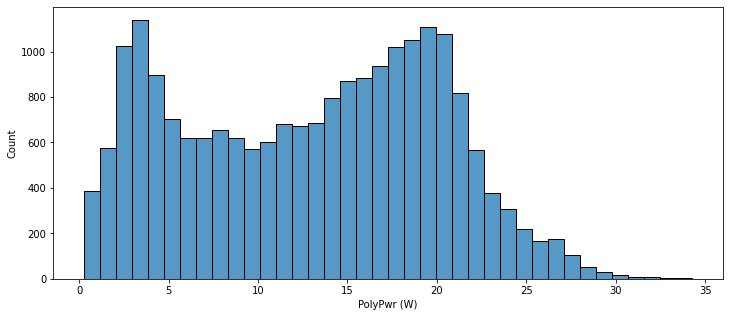

In [ ]:
# Plot histogram of target variable
plt.figure(figsize=(12,5))
sns.histplot(df.PolyPwr);
plt.xlabel('PolyPwr (W)');

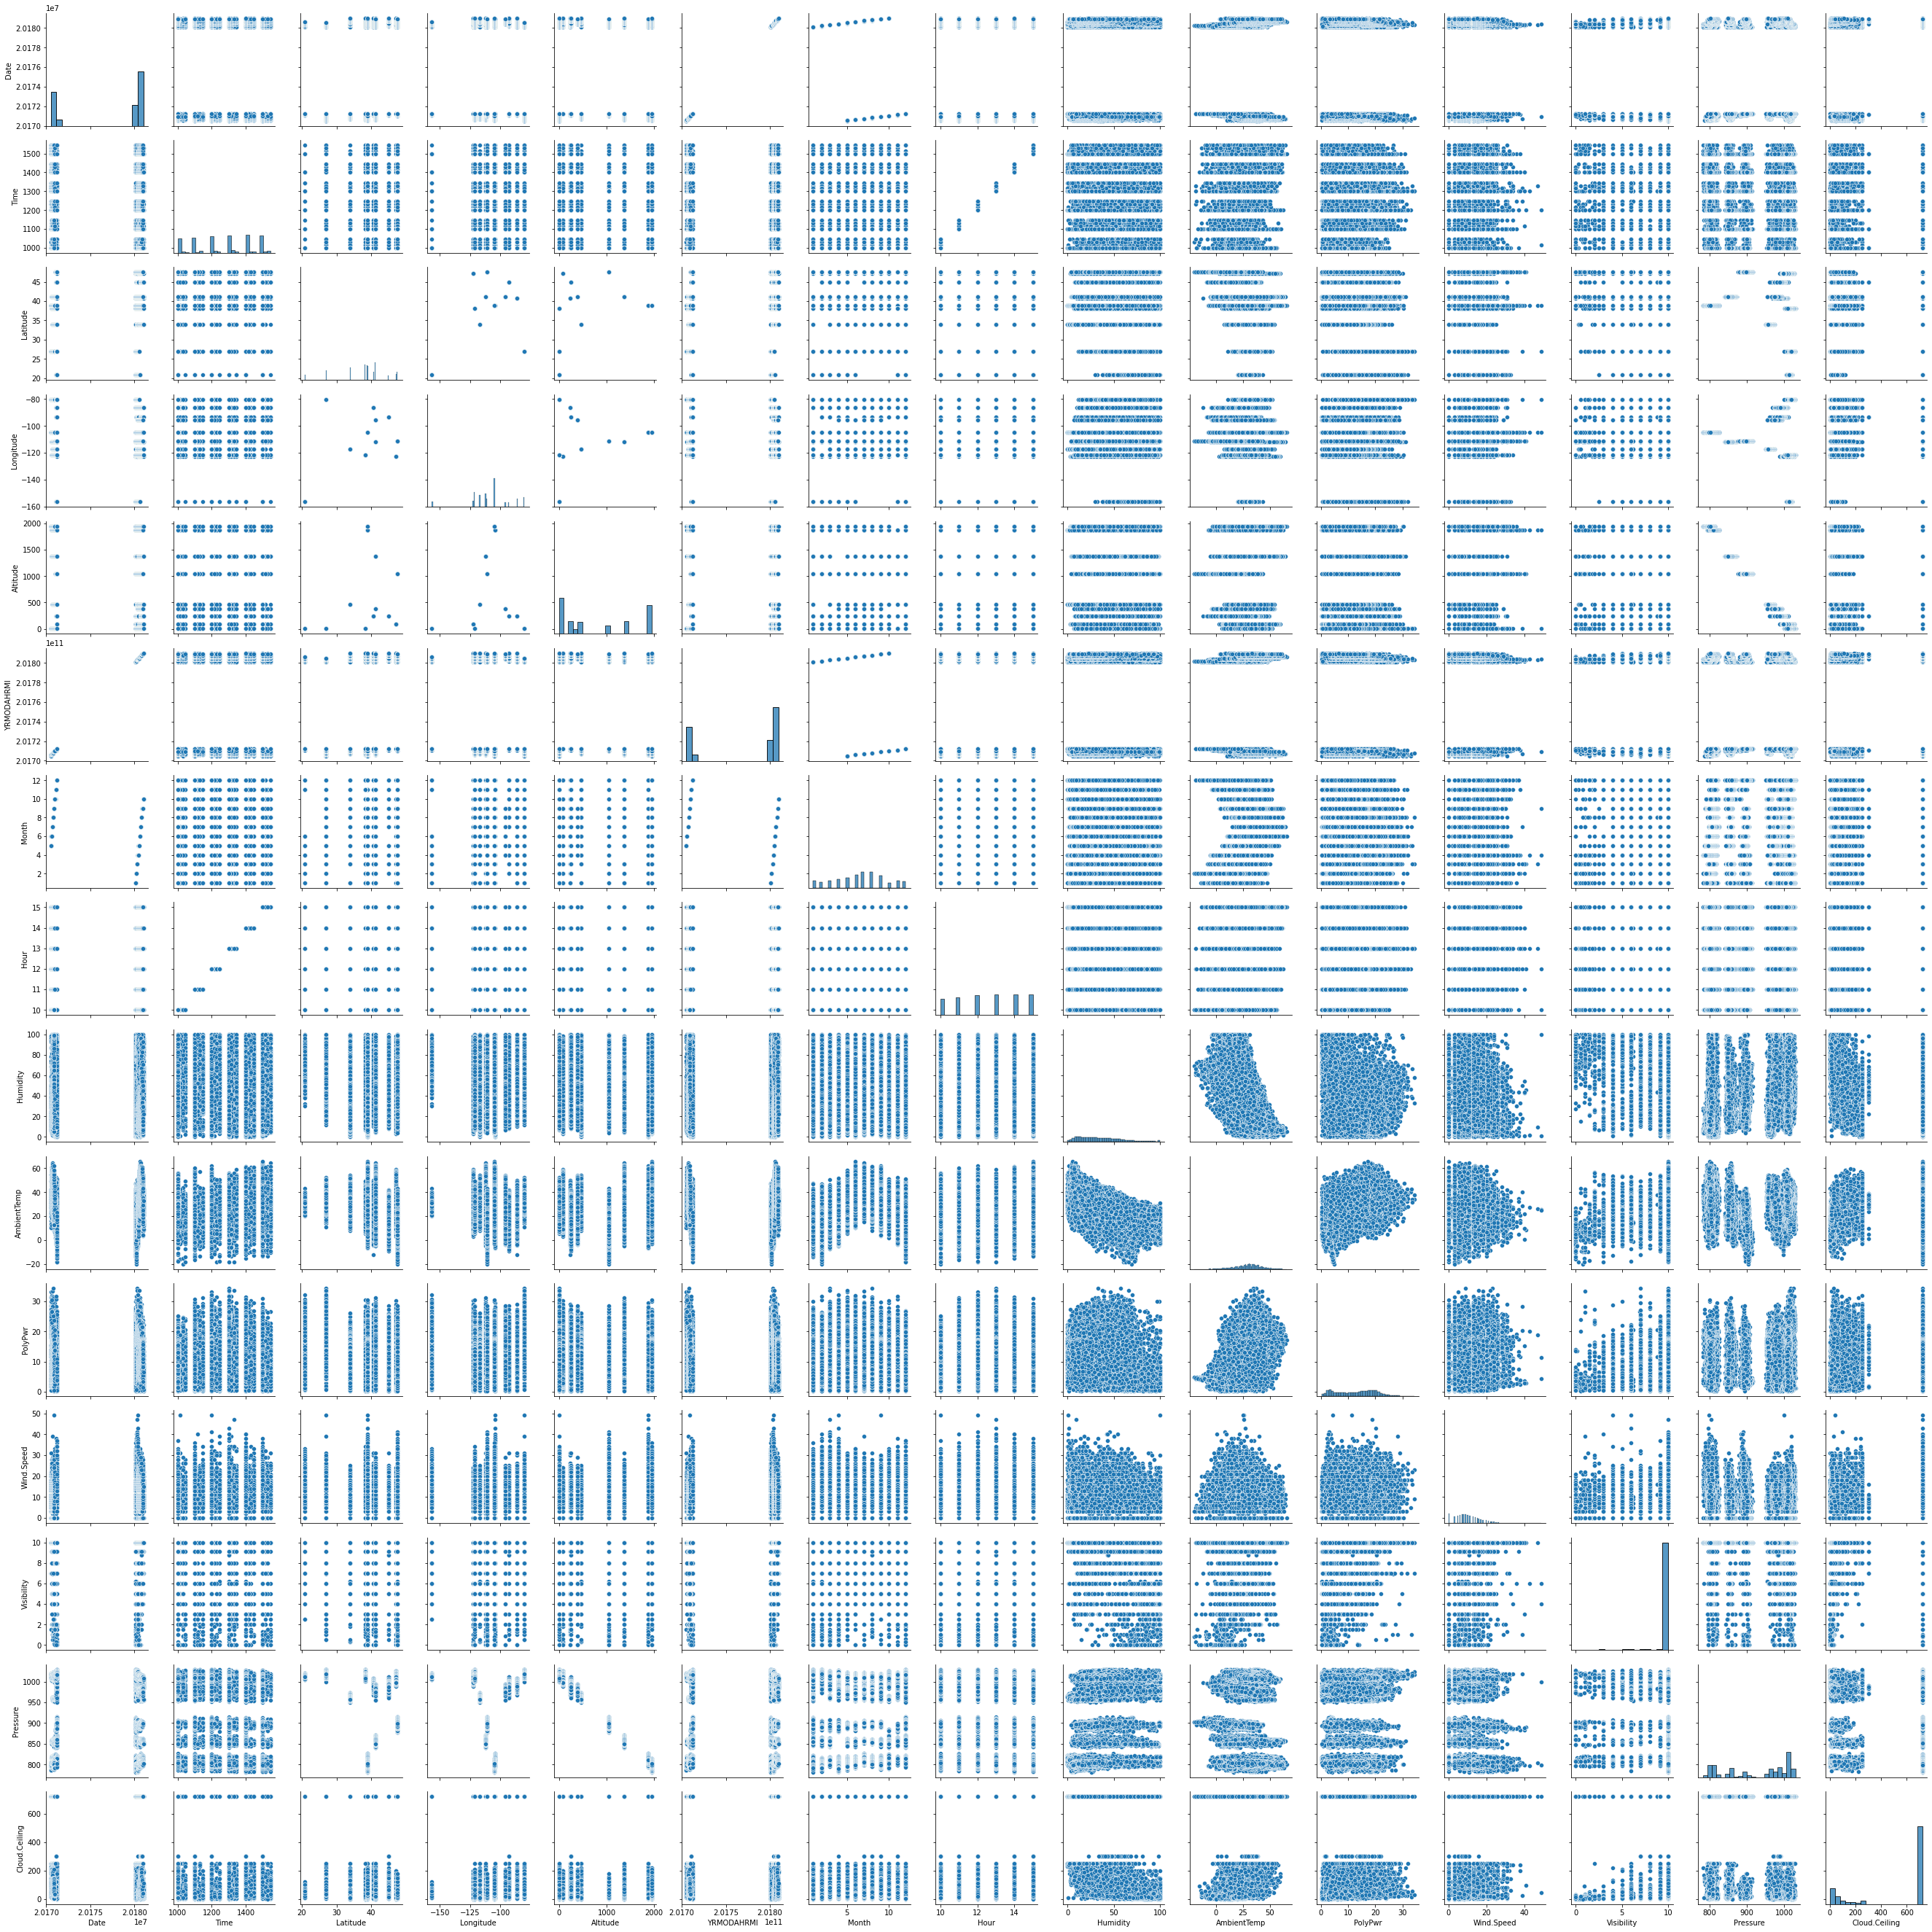

In [ ]:
sns.pairplot(df)

In [ ]:
df_corr = df[['Location', 'Time', 'Latitude', 'Longitude', 'Altitude',
              'YRMODAHRMI', 'Month', 'Hour', 'Season', 'Humidity', 'AmbientTemp',
              'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling', 'PolyPwr']].corr()

In [ ]:

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))


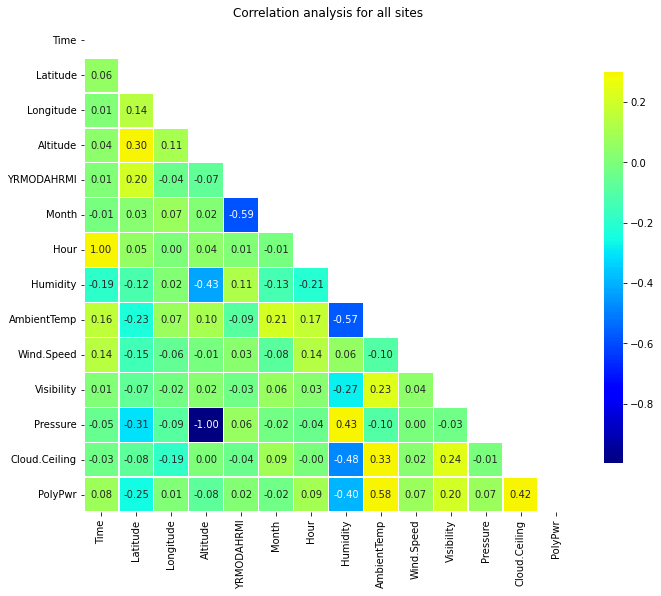

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_corr, mask=mask, cmap='jet', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8});
plt.title('Correlation analysis for all sites');

Summary of data Explorartion
1. The correlation between Ambient temperature, humidity and power improved when using site level data.
2. Also, some input features have their correlation sign with target change for individual sites compared with total sites data (e.g windspeed).
3. Hence, it may be necessary to build machine learning models per site to get the best out of the models. It might also be worth trying to encode the site-specific features like site location.
4. Altitude and pressure are perfectly correlated however, altitude does not change for a particular site and cannot be used for site-level modeling.

Data Preprocessing

In [ ]:
#checking for null values
df.isnull().sum()

Location         0
Date             0
Time             0
Latitude         0
Longitude        0
Altitude         0
YRMODAHRMI       0
Month            0
Hour             0
Season           0
Humidity         0
AmbientTemp      0
PolyPwr          0
Wind.Speed       0
Visibility       0
Pressure         0
Cloud.Ceiling    0
dtype: int64

No null values are present.

Feature Engineering

First, we perform the encoding of categorical variables namely location and season using the one-hot encoding method.

In [ ]:
# Encode location data
df_with_location_en = pd.get_dummies(df, columns=['Location'], drop_first=True)

In [ ]:
# Encode season data
df_with_loc_season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

In [ ]:
min_hour_of_interest = 10
max_hour_of_interest = 15

In [ ]:
df_with_loc_season_en['delta_hr']= df_with_loc_season_en.Hour - min_hour_of_interest

It should be noted that only data between 10 am and 3 pm is available which cuts out the period when the systems are not expected to generate power.

In [ ]:
# Create Cyclic date features
df_with_loc_season_en['sine_mon']= np.sin((df_with_loc_season_en.Month - 1)*np.pi/11)
df_with_loc_season_en['cos_mon']= np.cos((df_with_loc_season_en.Month - 1)*np.pi/11)
df_with_loc_season_en['sine_hr']= np.sin((df_with_loc_season_en.delta_hr*np.pi/(max_hour_of_interest - min_hour_of_interest)))
df_with_loc_season_en['cos_hr']= np.cos((df_with_loc_season_en.delta_hr*np.pi/(max_hour_of_interest - min_hour_of_interest)))

In [ ]:
mask2 = np.triu(np.ones_like(df_with_loc_season_en.corr(), dtype=bool))

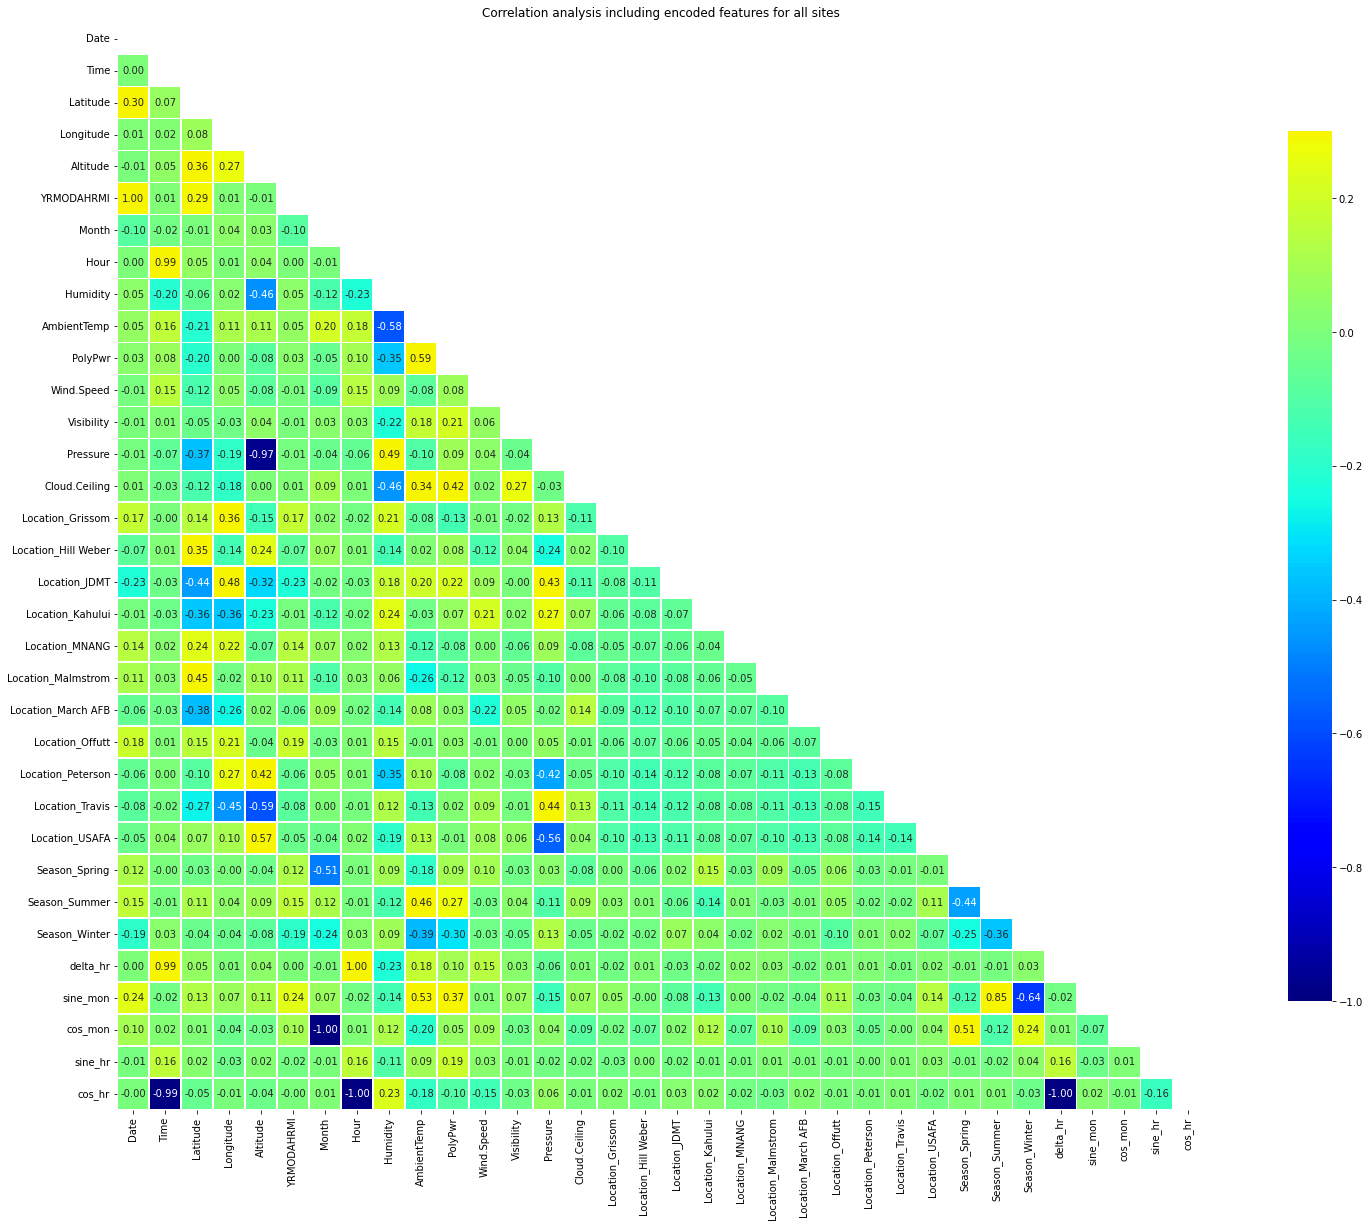

In [ ]:
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(df_with_loc_season_en.corr(method='spearman'), mask=mask2, cmap='jet', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8});
plt.title('Correlation analysis including encoded features for all sites');

In [ ]:
df_with_loc_season_en.head()

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,...,Location_Travis,Location_USAFA,Season_Spring,Season_Summer,Season_Winter,delta_hr,sine_mon,cos_mon,sine_hr,cos_hr
0,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,81.71997,12.86919,...,0,0,0,0,1,1,5.665539e-16,-1.0,0.587785,0.809017
1,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,96.64917,9.66415,...,0,0,0,0,1,3,5.665539e-16,-1.0,0.951057,-0.309017
2,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,93.61572,15.44983,...,0,0,0,0,1,3,5.665539e-16,-1.0,0.951057,-0.309017
3,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,77.21558,10.36659,...,0,0,0,0,1,2,5.665539e-16,-1.0,0.951057,0.309017
4,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,54.80347,16.85471,...,0,0,0,0,1,4,5.665539e-16,-1.0,0.587785,-0.809017


Additional correlation analysis including newly created features shows a perfect correlation between the cosine of date features and their actual values (Month and Hour). Hence, Month and Hour features are dropped in the modeling process.

Modeling

Feature Selection

In [ ]:
selected_columns = ['Latitude', 'Humidity', 'AmbientTemp', 'PolyPwr', 'Wind.Speed',
                     'Visibility', 'Pressure', 'Cloud.Ceiling', 'Location_Grissom',
                     'Location_Hill Weber', 'Location_JDMT', 'Location_Kahului',
                     'Location_MNANG', 'Location_Malmstrom', 'Location_March AFB',
                     'Location_Offutt', 'Location_Peterson', 'Location_Travis',
                     'Location_USAFA','Season_Spring', 'Season_Summer', 'Season_Winter',
                     'sine_mon', 'cos_mon', 'sine_hr', 'cos_hr']

In [ ]:
df_processed = df_with_loc_season_en[selected_columns].reset_index(drop=True)

In [ ]:
target_label = 'PolyPwr'
input_feat = list(set(selected_columns).difference(set([target_label])))


Summary of feature selection
1. Altitude is dropped because it has a high correlation with Pressure but does not change for a given location while presesure is more dynamic.
2. Longitude is dropped because it has zero correlation with the target variable.
3. Time, Hour, Month and Date are dropped because they have strong correlations with the engineered cyclic features but low correlation with the target variable.

In [ ]:
#Extract test set from all data
df_X = df_processed[input_feat].reset_index(drop=True)
df_y = df_processed[target_label]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

KNN Model 

In [ ]:
# Scale training data
estimators = []
estimators.append(('standardize', StandardScaler()))
# estimators.append(('minmax', MinMaxScaler()))
estimators.append(('knn', KNeighborsRegressor(algorithm='ball_tree', weights='distance')))
knn_pipeline = Pipeline(estimators)

In [ ]:
# Create list of each hyper-param to tune
n_neighbors_list = [5,10,15]
leaf_size_list = [20, 30, 40]
p_list = [2, 3, 4]

In [ ]:
# Structure model hyper-params as a dictionary
knn_grid = {'knn__n_neighbors':n_neighbors_list,'knn__leaf_size':leaf_size_list,
             'knn__p':p_list}
             
             

In [ ]:
# Create random search for  model
knn_random = RandomizedSearchCV(estimator=knn_pipeline, param_distributions=knn_grid, 
                                 n_iter=1000, cv=4, verbose=2, random_state=42, 
                                 n_jobs=-1)

In [ ]:
knn_random.fit(X_train, y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 27 is smaller than n_iter=1000. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('standardize', StandardScaler()),
                                             ('knn',
                                              KNeighborsRegressor(algorithm='ball_tree',
                                                                  weights='distance'))]),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'knn__leaf_size': [20, 30, 40],
                                        'knn__n_neighbors': [5, 10, 15],
                                        'knn__p': [2, 3, 4]},
                   random_state=42, verbose=2)

In [ ]:
# Get optimal hyper-params
knn_random.best_params_

{'knn__p': 2, 'knn__n_neighbors': 15, 'knn__leaf_size': 20}

In [ ]:
# Get score of best model during hyper-param tuning
knn_random.best_score_

0.6291077206900468

In [ ]:
mean_score = knn_random.cv_results_['mean_test_score']
std_score = knn_random.cv_results_['std_test_score']
params = knn_random.cv_results_['params']

In [ ]:
cv_score_df = pd.DataFrame(params)
cv_score_df['mean_score'] = mean_score
cv_score_df['std_score'] = std_score

In [ ]:
knn_model = knn_pipeline.set_params(**knn_random.best_params_)

In [ ]:
knn_model.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('knn',
                 KNeighborsRegressor(algorithm='ball_tree', leaf_size=20,
                                     n_neighbors=15, weights='distance'))])

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
# Explained variance
explained_variance_score(y_test.ravel(), y_pred)

0.6196315824160654

In [ ]:
# R2 score
r2_score(y_test.ravel(), y_pred)

0.6184069962937428

In [ ]:
# Mean absolute error
mean_absolute_error(y_test.ravel(), y_pred)

2.970990850370644

In [ ]:
# Root mean square error
np.sqrt(mean_squared_error(y_test.ravel(), y_pred))

4.40285342242806

In [ ]:
mean_absolute_percentage_error(y_test.ravel(), y_pred)*100

58.55911960757597

RF model

In [ ]:
# Create list of each hyper-param to tune
n_estimators_list = [300,900,1200,1800]

max_features_list = ['auto', 'sqrt']

max_depth_list = [5,10,15,20]
min_samples_split_list = [2, 5, 10]

min_samples_leaf_list = [1, 2, 4]



In [ ]:
# Structure model hyper-params as a dictionary
rf_grid = {'n_estimators': n_estimators_list,
           'max_depth': max_depth_list,
           'min_samples_split': min_samples_split_list,
           'min_samples_leaf': min_samples_leaf_list}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create base RF model
rf_base = RandomForestRegressor(random_state=42, max_features='sqrt',bootstrap='True')

In [ ]:
# Create random search for RF model
rf_random = RandomizedSearchCV(estimator=rf_base, param_distributions=rf_grid, 
                                 n_iter=1000, cv=4, verbose=2, random_state=42, 
                                 n_jobs=-1)

In [ ]:
# Fit the random search RF model
rf_random.fit(X_train, y_train)

Fitting 4 folds for each of 144 candidates, totalling 576 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 144 is smaller than n_iter=1000. Running 144 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=4,
                   estimator=RandomForestRegressor(bootstrap='True',
                                                   max_features='sqrt',
                                                   random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [300, 900, 1200, 1800]},
                   random_state=42, verbose=2)

In [ ]:
# Get optimal hyper-params
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 20}

In [ ]:
# Get score of best model during hyper-param tuning
rf_random.best_score_

0.6715891177919713

In [ ]:
mean_score = rf_random.cv_results_['mean_test_score']
std_score = rf_random.cv_results_['std_test_score']
params = rf_random.cv_results_['params']

In [ ]:
cv_score_df = pd.DataFrame(params)
cv_score_df['mean_score'] = mean_score
cv_score_df['std_score'] = std_score

In [ ]:
rf_model = RandomForestRegressor(**rf_random.best_params_, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=1800,
                      random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
# Explained variance
explained_variance_score(y_test.ravel(), y_pred)

0.6675851539205848

In [ ]:
# R2 score
r2_score(y_test.ravel(), y_pred)

0.6675522426519772

In [ ]:
# Mean absolute error
mean_absolute_error(y_test.ravel(), y_pred)

2.7582138057177374

In [ ]:
# Root mean square error
np.sqrt(mean_squared_error(y_test.ravel(), y_pred))

4.109563821325236

In [ ]:
rf_model.feature_importances_

array([0.051248  , 0.01540438, 0.04079773, 0.00824226, 0.00142566,
       0.05329967, 0.00183539, 0.00566228, 0.42820327, 0.00188542,
       0.0844577 , 0.00671116, 0.09415764, 0.00177802, 0.09640267,
       0.00132733, 0.00162403, 0.00354678, 0.00379661, 0.0033799 ,
       0.02940416, 0.03360273, 0.00378161, 0.00091529, 0.0271103 ])

In [ ]:
# Calculate scaled feature importance as a percentage
feat_imp_score = (rf_model.feature_importances_/max(rf_model.feature_importances_)*100)

In [ ]:
feature_ranking_with_score = dict(sorted(zip(feat_imp_score, input_feat), reverse=True))
feature_ranking_with_score

{100.0: 'AmbientTemp',
 22.51329665072026: 'Humidity',
 21.989004043280044: 'Cloud.Ceiling',
 19.723740315794824: 'Pressure',
 12.447282854818683: 'sine_mon',
 11.968147755887593: 'cos_mon',
 9.527654146379556: 'Wind.Speed',
 7.847377571051552: 'cos_hr',
 6.866870285558403: 'sine_hr',
 6.33117525330685: 'Latitude',
 3.5974455376092576: 'Location_JDMT',
 1.9248469421671217: 'Season_Spring',
 1.567283897491397: 'Location_Hill Weber',
 1.3223340617227048: 'Location_Grissom',
 0.886637909511568: 'Visibility',
 0.8831342024381872: 'Season_Winter',
 0.8282941352909632: 'Location_USAFA',
 0.7893209303125713: 'Location_Peterson',
 0.4403101452154014: 'Location_MNANG',
 0.4286270244975601: 'Location_March AFB',
 0.41522796637568765: 'Location_Offutt',
 0.3792661143591857: 'Season_Summer',
 0.33293999683685943: 'Location_Kahului',
 0.3099756025327727: 'Location_Travis',
 0.2137522395706114: 'Location_Malmstrom'}

In [ ]:
feat_ranking_list = list(feature_ranking_with_score.values())
np.array(feat_ranking_list)

array(['AmbientTemp', 'Humidity', 'Cloud.Ceiling', 'Pressure', 'sine_mon',
       'cos_mon', 'Wind.Speed', 'cos_hr', 'sine_hr', 'Latitude',
       'Location_JDMT', 'Season_Spring', 'Location_Hill Weber',
       'Location_Grissom', 'Visibility', 'Season_Winter',
       'Location_USAFA', 'Location_Peterson', 'Location_MNANG',
       'Location_March AFB', 'Location_Offutt', 'Season_Summer',
       'Location_Kahului', 'Location_Travis', 'Location_Malmstrom'],
      dtype='<U19')

LGBM model

In [ ]:
# Create list of each hyper-param to tune
n_estimators_list = [300, 600, 900, 1200]

learning_rate_list = [0.001, 0.005,0.01,0.1]

max_depth_list = [2,5,8,11]


n_leaves_list = [400,700,1000,1400]

feature_fraction_list = [0.1,0.2,0.4,0.6]



In [ ]:
# Structure model hyper-params as a dictionary
lgbm_grid = {'num_leaves':n_leaves_list,
             'max_depth':max_depth_list,
             'learning_rate':learning_rate_list,
             'n_estimators':n_estimators_list,
             'feature_fraction':feature_fraction_list}

In [ ]:
# Create base LGBM model
from lightgbm import LGBMRegressor
lgbm_base = LGBMRegressor(objective='rmse')

In [ ]:
# Create random search for LGBM model
lgbm_random = RandomizedSearchCV(estimator=lgbm_base, param_distributions=lgbm_grid, 
                                 n_iter=1000, cv=4, verbose=2, random_state=42, 
                                 n_jobs=-1)

In [ ]:
# Fit the random search LGBM model
lgbm_random.fit(X_train, y_train)

Fitting 4 folds for each of 1000 candidates, totalling 4000 fits


RandomizedSearchCV(cv=4, estimator=LGBMRegressor(objective='rmse'), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'feature_fraction': [0.1, 0.2, 0.4,
                                                             0.6],
                                        'learning_rate': [0.001, 0.005, 0.01,
                                                          0.1],
                                        'max_depth': [2, 5, 8, 11],
                                        'n_estimators': [300, 600, 900, 1200],
                                        'num_leaves': [400, 700, 1000, 1400]},
                   random_state=42, verbose=2)

In [ ]:
# Get optimal hyper-params
lgbm_random.best_params_

{'num_leaves': 1000,
 'n_estimators': 1200,
 'max_depth': 11,
 'learning_rate': 0.005,
 'feature_fraction': 0.6}

In [ ]:
# Get score of best model during hyper-param tuning
lgbm_random.best_score_

0.6701649537306653

In [ ]:
mean_score = lgbm_random.cv_results_['mean_test_score']
std_score = lgbm_random.cv_results_['std_test_score']
params = lgbm_random.cv_results_['params']

In [ ]:
cv_score_df = pd.DataFrame(params)
cv_score_df['mean_score'] = mean_score
cv_score_df['std_score'] = std_score

In [ ]:
# Random
lgbm_model = LGBMRegressor(objective='rmse')

In [ ]:
lgbm_model.fit(X_train, y_train)

LGBMRegressor(objective='rmse')

In [ ]:
y_pred = lgbm_model.predict(X_test)

In [ ]:
# Explained variance
explained_variance_score(y_test.ravel(), y_pred)

0.6612536544173614

In [ ]:
# R2 score
r2_score(y_test.ravel(), y_pred)

0.6612491110124457

In [ ]:
# Mean absolute error
mean_absolute_error(y_test.ravel(), y_pred)

2.849815975914903

In [ ]:
# Root mean square error
np.sqrt(mean_squared_error(y_test.ravel(), y_pred))

4.148339075808761

In [ ]:
y_all_pred = lgbm_model.predict(df_X.values)

In [ ]:
r2_score(df_y.values, y_all_pred)

0.7185427064763108

In [ ]:
# Calculate scaled feature importance as a percentage
feat_imp_score = (lgbm_model.feature_importances_/max(lgbm_model.feature_importances_)*100)

In [ ]:
feature_ranking_with_score = dict(sorted(zip(feat_imp_score, input_feat), reverse=True))
feature_ranking_with_score

{100.0: 'AmbientTemp',
 93.39805825242719: 'Humidity',
 81.74757281553397: 'Pressure',
 56.699029126213595: 'Cloud.Ceiling',
 40.3883495145631: 'cos_mon',
 38.25242718446602: 'Wind.Speed',
 32.23300970873787: 'cos_hr',
 26.601941747572816: 'Latitude',
 25.04854368932039: 'sine_mon',
 21.74757281553398: 'sine_hr',
 9.902912621359224: 'Location_Hill Weber',
 8.932038834951456: 'Location_Grissom',
 8.54368932038835: 'Season_Spring',
 5.825242718446602: 'Location_USAFA',
 5.631067961165048: 'Visibility',
 5.048543689320388: 'Location_Peterson',
 4.466019417475728: 'Location_MNANG',
 3.6893203883495143: 'Location_JDMT',
 2.3300970873786406: 'Season_Summer',
 2.1359223300970873: 'Location_Travis',
 1.5533980582524272: 'Location_Kahului',
 0.5825242718446602: 'Season_Winter',
 0.3883495145631068: 'Location_Malmstrom'}

In [ ]:
feat_ranking_list = list(feature_ranking_with_score.values())
np.array(feat_ranking_list)

array(['AmbientTemp', 'Humidity', 'Pressure', 'Cloud.Ceiling', 'cos_mon',
       'Wind.Speed', 'cos_hr', 'Latitude', 'sine_mon', 'sine_hr',
       'Location_Hill Weber', 'Location_Grissom', 'Season_Spring',
       'Location_USAFA', 'Visibility', 'Location_Peterson',
       'Location_MNANG', 'Location_JDMT', 'Season_Summer',
       'Location_Travis', 'Location_Kahului', 'Season_Winter',
       'Location_Malmstrom'], dtype='<U19')

In [ ]:
# Define the base models
base0 = list()
base0.append(('lgbm', lgbm_model))
base0.append(('rf', rf_model))
base0.append(('knn', knn_model))

In [ ]:
# Define meta learner model
from sklearn.linear_model import LinearRegression
base1 = LinearRegression()

In [ ]:
# Define the stacking ensemble
from sklearn.ensemble import  StackingRegressor
stacked_model = StackingRegressor(estimators=base0, final_estimator=base1, cv=4, passthrough=True)

In [ ]:
# Fit the model on the training data
stacked_model.fit(X_train, y_train)

StackingRegressor(cv=4,
                  estimators=[('lgbm', LGBMRegressor(objective='rmse')),
                              ('rf',
                               RandomForestRegressor(max_depth=20,
                                                     min_samples_split=5,
                                                     n_estimators=1800,
                                                     random_state=42)),
                              ('knn',
                               Pipeline(steps=[('standardize',
                                                StandardScaler()),
                                               ('knn',
                                                KNeighborsRegressor(algorithm='ball_tree',
                                                                    leaf_size=20,
                                                                    n_neighbors=15,
                                                                    weights='distance'))]))],
       

In [ ]:
y_pred = stacked_model.predict(X_test)

In [ ]:
# Explained variance
explained_variance_score(y_test.ravel(), y_pred)

0.6721671617744213

In [ ]:
# R2 score
r2_score(y_test.ravel(), y_pred)

0.6721551588325831

In [ ]:
# Mean absolute error
mean_absolute_error(y_test.ravel(), y_pred)

2.7521888173887845

In [ ]:
# Root mean square error
np.sqrt(mean_squared_error(y_test.ravel(), y_pred))

4.081015109435131

Model             R^2
KNN               0.618
RF                0.667
LGBM              0.661

Results show that the best RF model has the highest R^2 score across all algorithms investigated.

Stacked model R^2 has the best performance. 

Feature importance

LGBM model

1.   100.0: 'AmbientTemp
2.   93.39805825242719: 'Humidity'
3.   81.74757281553397: 'Pressure'
4.   56.699029126213595: 'Cloud.Ceiling'
5.   40.3883495145631: 'cos_mon'

 RF model
 

1.   100.0: 'AmbientTemp'
2.    22.51329665072026: 'Humidity',
3.    21.989004043280044: 'Cloud.Ceiling',
4.   19.723740315794824: 'Pressure',
5.   12.447282854818683: 'sine_mon'









Ambient temperature, humidity, cloud ceiling, and pressure are present in the top 5 features for both LGBM and RF models.